In [11]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import numpy as np
from torchvision import transforms

import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader

from net import BusterNet
from dataset import USCISIDataset

In [13]:

def viz(imgs_np, simi_out_np, mani_out_np, mask_out_np, index):
    fig = plt.figure(figsize=(20, 80))

    img = imgs_np[index]
    img = imgs_np[index] * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]

    ax = fig.add_subplot(1, 4, 1)
    plt.imshow(img)
    plt.title('Original Image')

    simi_pred = (simi_out_np[index] * 2).astype(np.uint8)
    ax = fig.add_subplot(1, 4, 2)
    plt.imshow(simi_pred[:,:, 0])
    plt.title('Similarity mask')

    mani_pred = (mani_out_np[index] * 2).astype(np.uint8)
    ax = fig.add_subplot(1, 4, 3)
    plt.imshow(mani_pred[:,:, 0])
    plt.title('Manipulation mask')

    mask_pred = (mask_out_np[index] * 2).astype(np.uint8) * 255
    ax = fig.add_subplot(1, 4, 4)
    plt.imshow(mask_pred)
    plt.title('Output mask')

    plt.show()

In [14]:
# Download dataset to ./datasets/
lmdb_dir = './datasets/USCISI-CMFD'
test_file = 'test.keys'
input_size = 256

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]),
])
target_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
])
test_set = USCISIDataset(lmdb_dir, test_file, transform, target_transform)

test_params = {'batch_size': 16,
               'shuffle': False,
               'drop_last': True,
            #    'collate_fn': collater,
               'num_workers': 0}

test_generator = DataLoader(test_set, **test_params)

In [15]:
data = next(iter(test_generator))

imgs, gts, _= data

In [16]:
model = BusterNet(256)

model.load_state_dict(torch.load('trained_model/buster_epoch_13.pth'))

model.eval()
with torch.no_grad():
    preds = model(imgs)
    
mask_out, mani_output, simi_output = preds

mask_out_np = mask_out.permute(0, 2, 3, 1).numpy()
mani_out_np = mani_output.permute(0, 2, 3, 1).numpy()
simi_out_np = simi_output.permute(0, 2, 3, 1).numpy()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


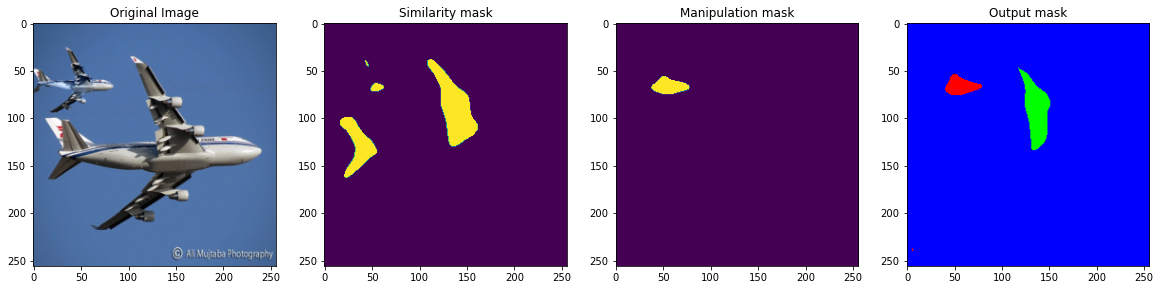

In [10]:
index = 8
imgs_np = imgs.permute(0, 2, 3, 1).numpy()

viz(imgs_np, simi_out_np, mani_out_np, mask_out_np, index)